<a href="https://colab.research.google.com/github/Sateeshkumar4425/stock-market-price-prediction-ml/blob/main/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#stock_prediction ML Project

This project help to predict the nearest value of stock price based on the previous Data

Loading the data

In [ ]:
import pandas as pd
import yfinance as yf
# Download historical stock data
stock_df = yf.download("TCS.NS", start="2023-01-01", end="2024-02-01")
stock_df.head()

/tmp/ipython-input-1540465610.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_df = yf.download("TCS.NS", start="2023-01-01", end="2024-02-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
Date,,,,,
2023-01-02,2932.793945,2937.649920,2909.189155,2932.389336,709547
2023-01-03,2977.665771,2985.444024,2918.271578,2924.296376,1245178
2023-01-04,2980.632568,2992.052965,2955.049519,2973.483734,1231668
2023-01-05,2977.440674,3001.000457,2951.227986,2994.615836,1826057
2023-01-06,2887.922363,2968.853069,2877.536212,2967.459219,2488376


checking the shape of dataset

In [ ]:
stock_df.shape

(266, 5)

In [ ]:
stock_df.info() #checking the information

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 266 entries, 2023-01-02 to 2024-01-31
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, TCS.NS)   266 non-null    float64
 1   (High, TCS.NS)    266 non-null    float64
 2   (Low, TCS.NS)     266 non-null    float64
 3   (Open, TCS.NS)    266 non-null    float64
 4   (Volume, TCS.NS)  266 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 12.5 KB


In [ ]:
stock_df.index #checking the index

DatetimeIndex(['2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05',
               '2023-01-06', '2023-01-09', '2023-01-10', '2023-01-11',
               '2023-01-12', '2023-01-13',
               ...
               '2024-01-16', '2024-01-17', '2024-01-18', '2024-01-19',
               '2024-01-23', '2024-01-24', '2024-01-25', '2024-01-29',
               '2024-01-30', '2024-01-31'],
              dtype='datetime64[ns]', name='Date', length=266, freq=None)

In [ ]:
stock_df.describe()   #checking the no.of numarical columns are predent in data

Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
count,266.000000,266.000000,266.000000,266.000000,2.660000e+02
mean,3166.509812,3190.695115,3141.514590,3166.467480,1.960196e+06
std,191.745729,194.534662,189.314994,190.970240,1.025942e+06
min,2841.412354,2862.932361,2823.616330,2841.779954,7.095470e+05
25%,3018.356567,3034.428260,2987.117736,3013.562831,1.350509e+06
50%,3144.131104,3168.427342,3123.922125,3148.651400,1.702616e+06
75%,3270.140503,3288.717004,3243.263443,3259.628597,2.238549e+06
max,3697.834717,3717.059837,3671.576016,3699.663402,8.531230e+06


In [ ]:
# Create short-term and long-term moving averages
stock_df['MA_10'] = stock_df['Close'].rolling(window=10).mean()
stock_df['MA_50'] = stock_df['Close'].rolling(window=50).mean()

stock_df.head(10)

Price,Close,High,Low,Open,Volume,MA_10,MA_50
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS,,
Date,,,,,,,
2023-01-02,2932.793945,2937.649920,2909.189155,2932.389336,709547,NaN,NaN
2023-01-03,2977.665771,2985.444024,2918.271578,2924.296376,1245178,NaN,NaN
2023-01-04,2980.632568,2992.052965,2955.049519,2973.483734,1231668,NaN,NaN
2023-01-05,2977.440674,3001.000457,2951.227986,2994.615836,1826057,NaN,NaN
2023-01-06,2887.922363,2968.853069,2877.536212,2967.459219,2488376,NaN,NaN
2023-01-09,2985.398926,2991.738542,2896.554948,2903.613992,2885060,NaN,NaN
2023-01-10,2955.229736,2965.660893,2904.603257,2953.970902,3864655,NaN,NaN
2023-01-11,2993.267090,3011.971119,2941.516355,2958.556941,2720512,NaN,NaN


In [ ]:
stock_df['MA_10'].head(10)        # pandas Series you can use  close == MA_10

,MA_10
Date,
2023-01-02,NaN
2023-01-03,NaN
2023-01-04,NaN
2023-01-05,NaN
2023-01-06,NaN
2023-01-09,NaN
2023-01-10,NaN
2023-01-11,NaN
2023-01-12,NaN


In [ ]:
stock_df['MA_10'].rolling(window=10)      # creates rolling window object

Rolling [window=10,center=False,axis=0,method=single]

In [ ]:
stock_df["MA_10"].mean()                  # calculates mean on that window

np.float64(3162.7069916365213)

In [ ]:
# Check if columns are MultiIndex
stock_df.columns.tolist()

[('Close', 'TCS.NS'),
 ('High', 'TCS.NS'),
 ('Low', 'TCS.NS'),
 ('Open', 'TCS.NS'),
 ('Volume', 'TCS.NS'),
 ('MA_10', ''),
 ('MA_50', '')]

In [ ]:
stock_df.head() #see the top 5 rows

Price,Date,Close,High,Low,Open,Volume,MA_10,MA_50
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS,,
49,2023-03-14,2956.692383,3038.956802,2951.588171,3016.516948,2670334,3061.503027,3105.944551
50,2023-03-15,2941.932129,2998.446027,2935.586496,2988.927353,1780522,3051.023364,3106.127314
51,2023-03-16,2929.148438,2961.152993,2917.192730,2950.300844,1901060,3032.565527,3105.156968
52,2023-03-17,2923.906738,2962.624709,2891.442344,2897.420199,6739966,3019.492456,3104.022451
53,2023-03-20,2890.798584,2915.031752,2846.424509,2915.031752,2289468,3001.204810,3102.289609


In [ ]:
stock_df = stock_df.reset_index()                   #resetting the index
stock_df.head()

Price,Date,Close,High,Low,Open,Volume,MA_10,MA_50
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS,,
0,2023-01-02,2932.793945,2937.649920,2909.189155,2932.389336,709547,NaN,NaN
1,2023-01-03,2977.665771,2985.444024,2918.271578,2924.296376,1245178,NaN,NaN
2,2023-01-04,2980.632568,2992.052965,2955.049519,2973.483734,1231668,NaN,NaN
3,2023-01-05,2977.440674,3001.000457,2951.227986,2994.615836,1826057,NaN,NaN
4,2023-01-06,2887.922363,2968.853069,2877.536212,2967.459219,2488376,NaN,NaN


 Select Features (X)

In [ ]:
# Select input features
features = ['Open', 'High', 'Low', 'Volume', 'MA_10', 'MA_50']
X = stock_df[features]

We choose price + trend features

Exclude:

Date → not numeric signal

Close → target leakage

Define Target (y)

In [ ]:
# Target variable
y = stock_df['Close']

The target variable must NOT be included in features to avoid data leakage.

Time-Series Train-Test Split

In [ ]:
# Time-series split (no shuffle)
split_index = int(len(stock_df) * 0.8)

X_train = X.iloc[:split_index]
X_test  = X.iloc[split_index:]

y_train = y.iloc[:split_index]
y_test  = y.iloc[split_index:]

Import the Model

In [ ]:
from sklearn.linear_model import LinearRegression

Check Where NaN Exists (DO THIS)

In [ ]:
stock_df.isna().sum()

,,0
Price,Ticker,
Date,,0
Close,TCS.NS,0
High,TCS.NS,0
Low,TCS.NS,0
Open,TCS.NS,0
Volume,TCS.NS,0
MA_10,,9
MA_50,,49


Drop NaN rows

In [ ]:
stock_df = stock_df.dropna()

In [ ]:
stock_df.isna().sum()

,,0
Price,Ticker,
Date,,0
Close,TCS.NS,0
High,TCS.NS,0
Low,TCS.NS,0
Open,TCS.NS,0
Volume,TCS.NS,0
MA_10,,0
MA_50,,0


Re-create Features & Target (MANDATORY)

In [ ]:
features = ['Open', 'High', 'Low', 'Volume', 'MA_10', 'MA_50']
X = stock_df[features]
y = stock_df['Close']

Time-series split again

In [ ]:
split_index = int(len(stock_df) * 0.8)

X_train = X.iloc[:split_index]
X_test  = X.iloc[split_index:]

y_train = y.iloc[:split_index]
y_test  = y.iloc[split_index:]

Train the Model (MOST IMPORTANT LINE)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on test data
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate errors
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)


MAE : 10.926067860690626
MSE : 232.9423564210805
RMSE: 15.262449227469373


Plot Actual vs Predicted

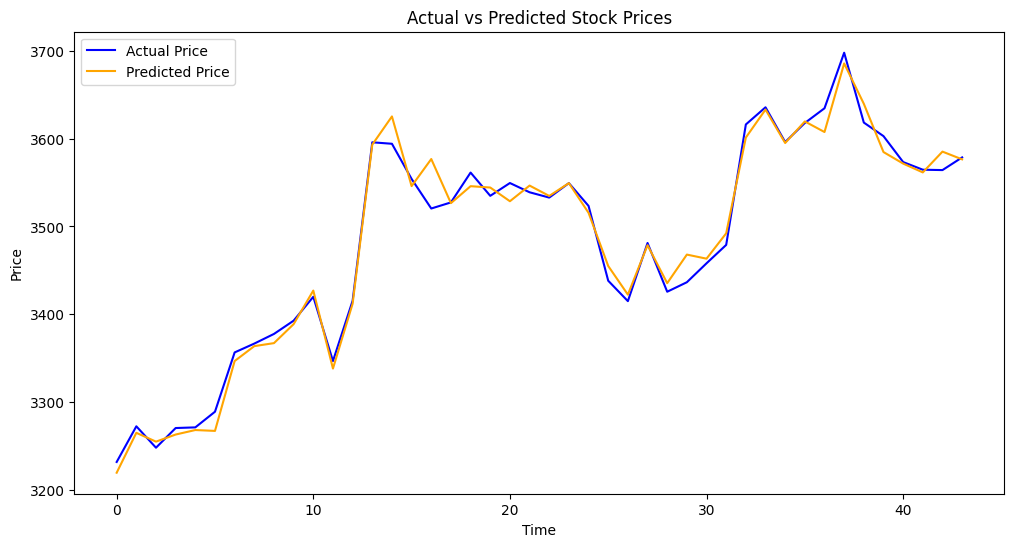

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual Price", color="blue")
plt.plot(y_pred, label="Predicted Price", color="orange")

plt.title("Actual vs Predicted Stock Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()


Take the Latest Feature Row


In [ ]:
# Take the most recent available data (last row)
latest_features = X.iloc[-1].values.reshape(1, -1)

In [ ]:
# Predict next day closing price
next_day_price = model.predict(latest_features)
print("Predicted Next Day Closing Price:", next_day_price[0])

Predicted Next Day Closing Price: [3576.41266694]


#Conclusion:Linear Regression captured the general price trend but struggled with sudden market volatility.